# Finding unique and overlapping board members

In [1]:
import pandas as pd
import numpy as np
import math
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import graphviz

pd.options.display.max_columns = 50

In [2]:
df = pd.read_csv("Reuters_scrape_people.csv")

Time to clean up the dataframe for analysis

In [3]:
df.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,MSFT,John Thompson,Bradford Smith,Satya Nadella,William Gates,Amy Hood,Kevin Scott,Christopher Capossela,Kathleen Hogan,Jean-Philippe Courtois,Margaret Johnson,Reid Hoffman,Hugh Johnston,Teri List-Stoll,Charles Noski,Helmut Panke,Sandra Peterson,Penny Pritzker,Charles Scharf,Arne Sorenson,John Stanton,Padmasree Warrior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,Art Levinson,Timothy Cook,Luca Maestri,Jeffrey Williams,Katherine Adams,Philip Schiller,Eddy Cue,Craig Federighi,John Giannandrea,Deirdre O'Brien,Daniel Riccio,Johny Srouji,Jonathan Ive,James Bell,Albert Gore,Robert Iger,Andrea Jung,Ronald Sugar,Sue Wagner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AMZN,Jeffrey Bezos,Brian Olsavsky,Andrew Jassy,Jeffrey Wilke,David Zapolsky,Jeffrey Blackburn,Shelley Reynolds,Rosalind Brewer,Jamie Gorelick,Daniel Huttenlocher,Judith McGrath,Indra Nooyi,Jonathan Rubinstein,Thomas Ryder,Patricia Stonesifer,Wendell Weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FB,Mark Zuckerberg,David Wehner,Sheryl Sandberg,Michael Schroepfer,Colin Stretch,David Fischer,Susan Desmond-Hellmann,Marc Andreessen,Kenneth Chenault,Peter Thiel,Jeffrey Zients,Deborah Crawford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRK.B,Warren Buffett,Charles Munger,Marc Hamburg,Gregory Abel,Ajit Jain,Howard Buffett,Ronald Olson,Stephen Burke,Susan Decker,William Gates,David Gottesman,Charlotte Guyman,Thomas Murphy,Walter Scott,Meryl Witmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.index = df["Unnamed: 0"]

In [5]:
df = df.drop(columns='Unnamed: 0')

Turning the dataframe rows into lists 

In [6]:
rows_list = df.values.tolist()

Creating a list of unique members 

In [7]:
unique_members = set(x for l in rows_list for x in l)

In [8]:
unique_members = list(unique_members)

In [9]:
len(unique_members)

1005

Removing nans from the lists of board members

In [10]:
cleaned_rows = []

for row in rows_list:
    n = len(row)
    j = -1
    for i in range(n):
      j += 1
      if not isinstance(row[j], str) and math.isnan(row[j]):
        del row[j]
        j = j-1
    cleaned_rows.append(row)
     

Creating a matrix of counts of shared board members between companies  

In [12]:
same_members = []
for item1 in cleaned_rows:
    numbers = []
    for item2 in cleaned_rows:
        sim = (len(list(set(item1).intersection(item2))))
        numbers.append(sim)
    same_members.append(numbers)

In [13]:
matrix = np.array(same_members)
m = np.asmatrix(matrix)

sim_matrix_df = pd.DataFrame(m)

In [16]:
sim_matrix_df.index = df.index

In [17]:
sim_matrix_df.columns = df.index

In [34]:
sim_matrix_df.index.name = None

In [35]:
sim_matrix_df.head()

,MSFT,AAPL,AMZN,FB,BRK.B,JPM,GOOGL,JNJ,XOM,V,PG,BAC,DIS,T,MA,CSCO,UNH,HD,CVX,VZ,INTC,PFE,MRK,KO,WFC,CMCSA,PEP,BA,C,MCD,WMT,ABT,ADBE,NFLX,MDT,ORCL,IBM,PM,PYPL,UNP,HON,ACN,COST,CRM,TXN,AVGO,SBUX,AMGN,TMO,UTX
MSFT,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
AAPL,0,19,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
AMZN,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
FB,0,0,0,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BRK.B,1,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


In [36]:
# sim_matrix_df.to_csv("company_sim_matrix.csv")

Creating a version of the matrix without companies comparing themselves against themselves

In [19]:
df2 = sim_matrix_df[sim_matrix_df < 10]

In [44]:
df2

,MSFT,AAPL,AMZN,FB,BRK.B,JPM,GOOGL,JNJ,XOM,V,PG,BAC,DIS,T,MA,CSCO,UNH,HD,CVX,VZ,INTC,PFE,MRK,KO,WFC,CMCSA,PEP,BA,C,MCD,WMT,ABT,ADBE,NFLX,MDT,ORCL,IBM,PM,PYPL,UNP,HON,ACN,COST,CRM,TXN,AVGO,SBUX,AMGN,TMO,UTX
MSFT,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAPL,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AMZN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
FB,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRK.B,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JPM,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
GOOGL,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
JNJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
df2[df2.sum() == 0]

,MSFT,AAPL,AMZN,FB,BRK.B,JPM,GOOGL,JNJ,XOM,V,PG,BAC,DIS,T,MA,CSCO,UNH,HD,CVX,VZ,INTC,PFE,MRK,KO,WFC,CMCSA,PEP,BA,C,MCD,WMT,ABT,ADBE,NFLX,MDT,ORCL,IBM,PM,PYPL,UNP,HON,ACN,COST,CRM,TXN,AVGO,SBUX,AMGN,TMO,UTX
PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TXN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [426]:
# Dataframe with only companies that are interlocked to another company. PM,  UNP and TXN were eliminated.
df3 = df2[df2.sum() != 0]

In [427]:
df3 = df3.drop(columns=['PM','UNP','TXN'])

In [177]:
df3.shape

(47, 47)

Taking a quick look at the number of board members at each company that have seats on other boards

In [221]:
sizes = df3.sum().sort_values(ascending=False)


Time to find out which board member sits on the most boards

In [46]:
# turning members per company into lists 
rows_list

[['John Thompson',
  'Bradford Smith',
  'Satya Nadella',
  'William Gates',
  'Amy Hood',
  'Kevin Scott',
  'Christopher Capossela',
  'Kathleen Hogan',
  'Jean-Philippe Courtois',
  'Margaret Johnson',
  'Reid Hoffman',
  'Hugh Johnston',
  'Teri List-Stoll',
  'Charles Noski',
  'Helmut Panke',
  'Sandra Peterson',
  'Penny Pritzker',
  'Charles Scharf',
  'Arne Sorenson',
  'John Stanton',
  'Padmasree Warrior'],
 ['Art Levinson',
  'Timothy Cook',
  'Luca Maestri',
  'Jeffrey Williams',
  'Katherine Adams',
  'Philip Schiller',
  'Eddy Cue',
  'Craig Federighi',
  'John Giannandrea',
  "Deirdre O'Brien",
  'Daniel Riccio',
  'Johny Srouji',
  'Jonathan Ive',
  'James Bell',
  'Albert Gore',
  'Robert Iger',
  'Andrea Jung',
  'Ronald Sugar',
  'Sue Wagner'],
 ['Jeffrey Bezos',
  'Brian Olsavsky',
  'Andrew Jassy',
  'Jeffrey Wilke',
  'David Zapolsky',
  'Jeffrey Blackburn',
  'Shelley Reynolds',
  'Rosalind Brewer',
  'Jamie Gorelick',
  'Daniel Huttenlocher',
  'Judith McGrath'

In [22]:
# turning members per company into lists 
unique_members

[nan,
 'Alfred Kelly',
 'Jennifer Doudna',
 'Jack Williams',
 'Jackie Lee-Joe',
 'Gail Wilensky',
 'Bradley Corson',
 'Brett Gerry',
 'Andrew Wilson',
 'Stephen Easterbrook',
 'Theodore Craver',
 'Shelley Reynolds',
 'Daniel London',
 'Susan Avery',
 'Mohamed Samir',
 'Francesca Debiase',
 'Marshall Larsen',
 'Francisco Crespo',
 'Sandra Rivera',
 'Brady Connor',
 'Rachel Whetstone',
 'Susan Bies',
 'Frances Jacobs',
 'Perry Pelos',
 'James Kilts',
 'Martin Schroeter',
 'David Calhoun',
 'Tracey Travis',
 'Peter Marks',
 'Daniel Riccio',
 'Jonathan Christodoro',
 'Robert Iger',
 'Juan Pujadas',
 'Mary Mack',
 'James Daley',
 'Mark Chandler',
 'Jeffrey Zients',
 'Marc Bolland',
 'Armando Codina',
 'John Meisenbach',
 'Ron Vachris',
 'TIMOTHY HOURIGAN',
 'Albert Carey',
 'Justine Page',
 'Susan Rice',
 'Martha Pollack',
 'Mark Blinn',
 'Stephen Burke',
 'Jeffrey Henley',
 'Johny Srouji',
 'Thomas May',
 'Galina Patil',
 'Celeste Clark',
 'Robin Washington',
 'Kenyatta Rocker',
 'Jeffrey 

In [47]:
# Counting how many times each unique members appears on a board 
l = []
for member in unique_members:
    count = 0
    d = {}
    d['person'] = member
    for row in rows_list:
        if row.count(member) == 1:
            count = count + 1
    d['freq'] = count
    l.append(d)
            
        

In [49]:
board_connections = pd.DataFrame(l)
board_connections.freq.value_counts()

1    947
2     53
3      4
0      1
Name: freq, dtype: int64

In [50]:
board_connections[board_connections.freq == 3]

,freq,person
47,3,Stephen Burke
53,3,Robin Washington
716,3,Ronald Sugar
749,3,Timothy Flynn


In [54]:
board_connections[board_connections.freq == 0]

,freq,person
0,0,NaN


In [71]:
# Search for a person 
df.apply(lambda row: row.astype(str).str.contains('Robin Washington').any(), axis=1)

In [508]:
df3.tail(5)

,Microsoft,Apple,Amazon,Facebook,Berkshire Hathaway,JPMorgan,Alphabet,Johnson & Johnson,Exxon Mobil,Visa,Procter & Gamble,Bank of America,Walt Disney,AT&T,Mastercard,Cisco,UnitedHealth Group,Home Depot,Chevron,Verizon,Intel,Pfizer,Merck & Co.,Coca-Cola,Wells Fargo,Comcast,PepsiCo,Boeing,Citigroup,McDonalds,Walmart,Abbott Laboratories,Adobe,Netflix,Medtronic Plc,Oracle,International Business Machines,PayPal,Honeywell International,Accenture,Costco,Salesforce.com,Broadcom,Starbucks,Amgen,Thermo Fisher Scientific,United Technologies
Broadcom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0
Starbucks,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
Amgen,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0
Thermo Fisher Scientific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
United Technologies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN


In [428]:
di ={'MSFT': 'Microsoft',
'AAPL': 'Apple',
'AMZN': 'Amazon',
'FB': 'Facebook',
'BRK.B': 'Berkshire Hathaway',
'JPM': 'JPMorgan',
'GOOGL': 'Alphabet',
'JNJ': 'Johnson & Johnson',
'XOM': 'Exxon Mobil',
'V': 'Visa',
'PG': 'Procter & Gamble',
'BAC': 'Bank of America',
'DIS': 'Walt Disney',
'T': 'AT&T',
'MA': 'Mastercard',
'CSCO': 'Cisco',
'UNH': 'UnitedHealth Group',
'HD': 'Home Depot',
'CVX': 'Chevron',
'VZ': 'Verizon',
'INTC': 'Intel',
'PFE': 'Pfizer',
'MRK': 'Merck & Co.',
'KO': 'Coca-Cola',
'WFC': 'Wells Fargo',
'CMCSA': 'Comcast',
'PEP': 'PepsiCo',
'BA': 'Boeing',
'C': 'Citigroup',
'MCD': 'McDonalds',
'WMT': 'Walmart',
'ABT': 'Abbott Laboratories',
'ADBE': 'Adobe',
'NFLX': 'Netflix',
'MDT': 'Medtronic Plc',
'ORCL': 'Oracle',
'IBM': 'International Business Machines',
'PM': 'Philip Morris International',
'PYPL': 'PayPal',
'UNP': 'Union Pacific',
'HON': 'Honeywell International',
'ACN': 'Accenture',
'COST': 'Costco',
'CRM': 'Salesforce.com',
'TXN': 'Texas Instruments',
'AVGO': 'Broadcom',
'SBUX': 'Starbucks',
'AMGN': 'Amgen',
'TMO': 'Thermo Fisher Scientific',
'UTX': 'United Technologies'}

df3 = df3.rename(columns=di)
df3 = df3.rename(index=di)


Some companies are connected to each other by more than one board members. I want to make a simple network graphic, so I'm going to create a dataframe where all company connections are treated as simple one-to-one connections.

In [530]:
df_viz = df3

In [531]:
df_viz['Contains two'] = (df_viz == 2).astype(int).sum()

In [532]:
df_viz[['Berkshire Hathaway', 'Chevron', 'Costco', 'Amgen']] = df_viz[['Berkshire Hathaway', 'Chevron', 'Costco', 'Amgen']].replace({1:1, 2:1})



In [533]:
df_viz.head()

,Microsoft,Apple,Amazon,Facebook,Berkshire Hathaway,JPMorgan,Alphabet,Johnson & Johnson,Exxon Mobil,Visa,Procter & Gamble,Bank of America,Walt Disney,AT&T,Mastercard,Cisco,UnitedHealth Group,Home Depot,Chevron,Verizon,Intel,Pfizer,Merck & Co.,Coca-Cola,Wells Fargo,Comcast,PepsiCo,Boeing,Citigroup,McDonalds,Walmart,Abbott Laboratories,Adobe,Netflix,Medtronic Plc,Oracle,International Business Machines,PayPal,Honeywell International,Accenture,Costco,Salesforce.com,Broadcom,Starbucks,Amgen,Thermo Fisher Scientific,United Technologies,test,Contains two,Contains three
Microsoft,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
Apple,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
Amazon,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
Facebook,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Berkshire Hathaway,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


Starting to visualize the data

In [539]:
G = nx.from_pandas_adjacency(df_viz)
G.name = 'Graph from pandas adjacency matrix'
print(nx.info(G))

Name: Graph from pandas adjacency matrix
Type: Graph
Number of nodes: 47
Number of edges: 110
Average degree:   4.6809


Creating size and colour variables to customize my network nodes

In [559]:
# Creating a size variable based the number of connections a company has to another
df_viz.sum().sort_values(ascending=False).head()

Microsoft    6.0
Amgen        6.0
JPMorgan     6.0
Walmart      5.0
Chevron      5.0
dtype: float64

In [560]:
sizes = df_viz.sum()

In [561]:
# multiplying the sizes so that networkx can recongize them as pixel values
sizes = sizes.values*2000

In [562]:
# Reading in stock sectors to colour by stock sector 
stock_sectors = pd.read_csv("stock_sectors.csv")

In [564]:
stock_sectors['colours']=stock_sectors.sector

In [565]:
colour_map = {1:'#b3e2cd', 2:'#fdcdac', 3:'#cbd5e8', 
 4:'#f4cae4', 5:'#e6f5c9', 6:'#fff2ae', 7:'#f1e2cc', 8:'#cccccc'}

In [566]:
stock_sectors = stock_sectors.replace({"colours": colour_map})

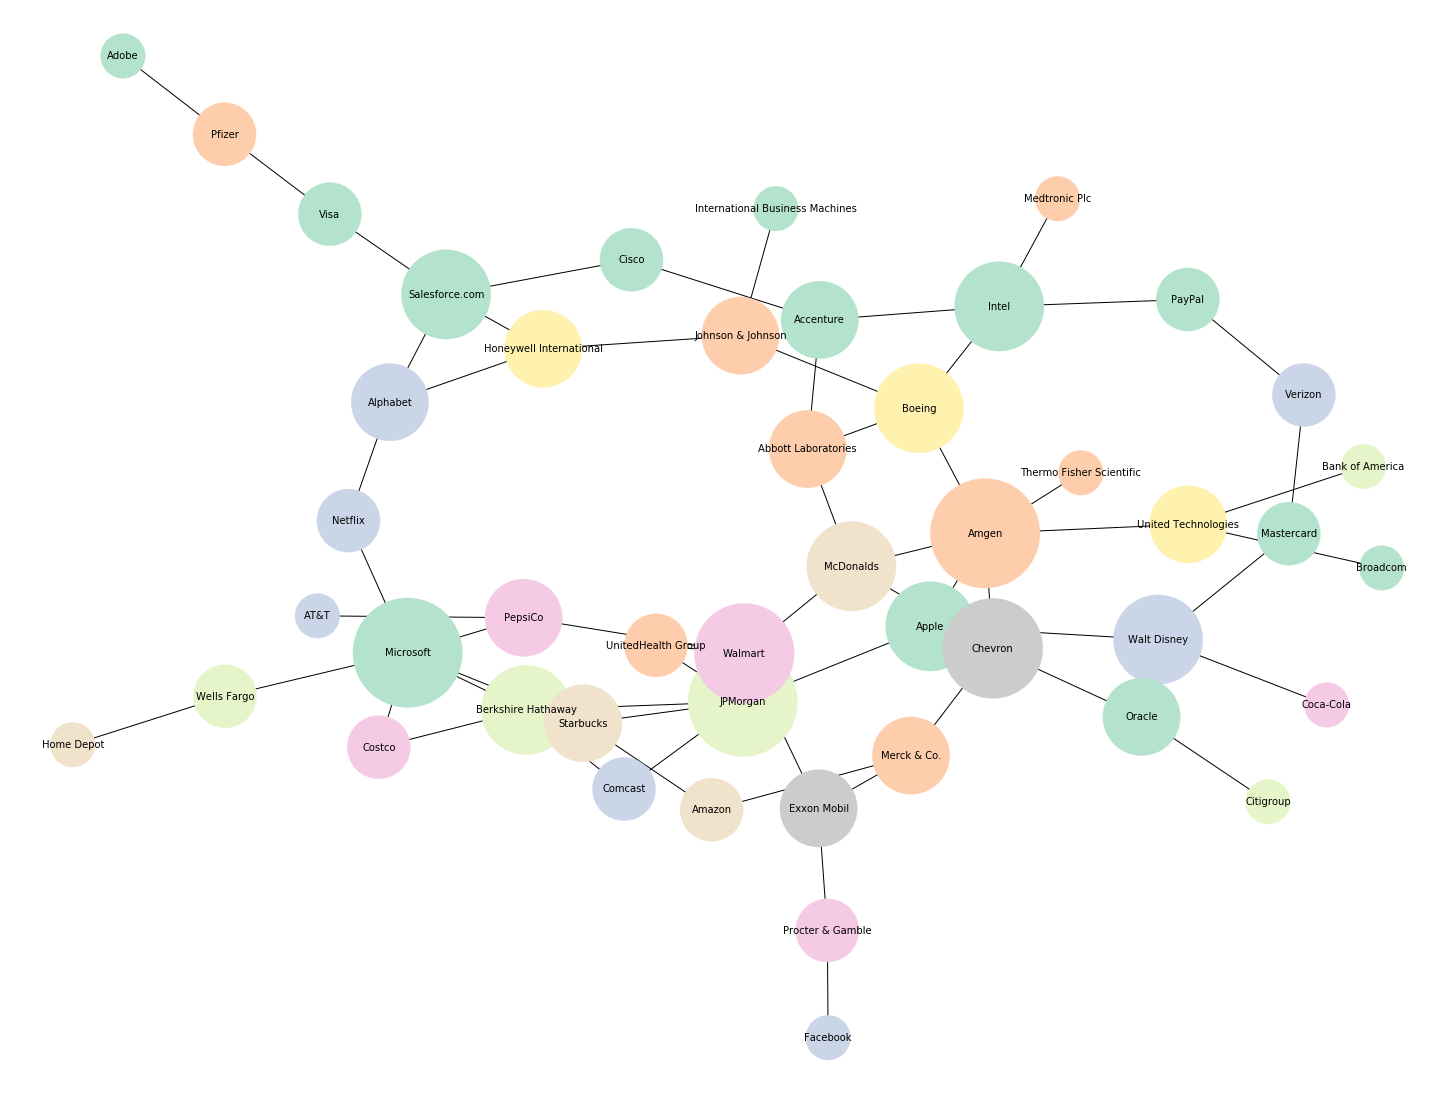

In [569]:
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout

plt.figure(figsize=(20,15))

matplotlib.rcParams['font.sans-serif'] = "Open Sans"

ax = nx.draw(G, pos=graphviz_layout(G),
    linewidths=0.2, font_size=10, with_labels=True, node_size=sizes, dpi=1000, node_color=stock_sectors.colours)

plt.savefig("network-cluster.svg")
plt.show()


In [435]:
# 94% of the S&P 500's top 50 companies share a board member with one another 